<a href="https://colab.research.google.com/github/martinnv6/Data-Science-Master/blob/main/practica2/Practice2_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Practica 2. Martin Navarrete Villegas

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip3 install fitter

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=a258f95665fdfcd537e7ea03f734619b2330bf7ca6164aff1e840e9f37d6d7f1
  Stored in directory: c:\users\martin_navarrete\appdata\local\pip\cache\wheels\2f\4b\12\1c9085f8ecb92805ca8645ab9c61703a2874685a9fb87b0bdb
Successfully built fitter


### Importing Libraries

In [6]:
# Data treatment
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Pre processing and modeling
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs, load_iris
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

# Others
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions


### Exploratory Analysis

#### Read the file

In [11]:
iris=pd.read_csv('Iris.csv')
# iris_sklearn = load_iris()
# iris = pd.DataFrame(data= np.c_[iris_sklearn['data'], iris_sklearn['target']],
#                      columns= iris_sklearn['feature_names'] + ['target'])


#### First 4 values

In [12]:
iris.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0


#### Column type

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


#### Number of observations and null values

#####Dataset dimensions



In [14]:
iris.shape

(150, 5)

#####Null observations per variable

In [15]:
iris.isna().sum().sort_values()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### Numerical variables

#####Sepal Length

AttributeError: 'DataFrame' object has no attribute 'SepalLengthCm'

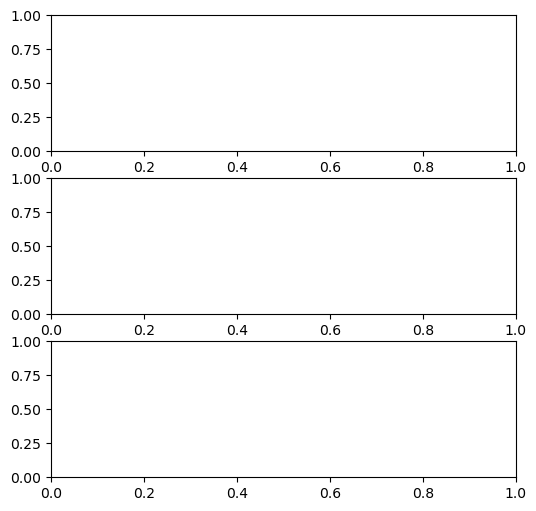

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    iris.SepalLengthCm,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original distribution", fontsize = 'medium')
axes[0].set_xlabel('Sepal Length', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(iris.SepalLengthCm),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Sepal Length)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(iris.SepalLengthCm),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logaritmic Transformation", fontsize = 'medium')
axes[2].set_xlabel('log(Sepal Length)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

#####Sepal Width

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/dis

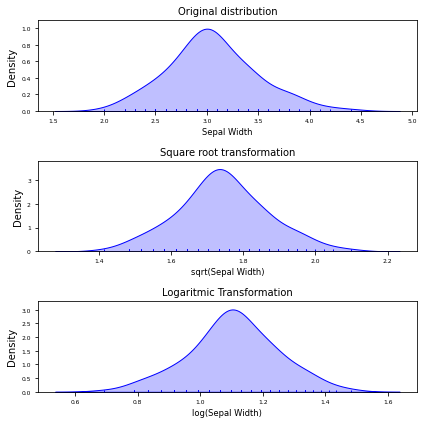

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    iris.SepalWidthCm,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original distribution", fontsize = 'medium')
axes[0].set_xlabel('Sepal Width', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(iris.SepalWidthCm),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Sepal Width)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(iris.SepalWidthCm),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logaritmic Transformation", fontsize = 'medium')
axes[2].set_xlabel('log(Sepal Width)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

#####Petal Length

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/dis

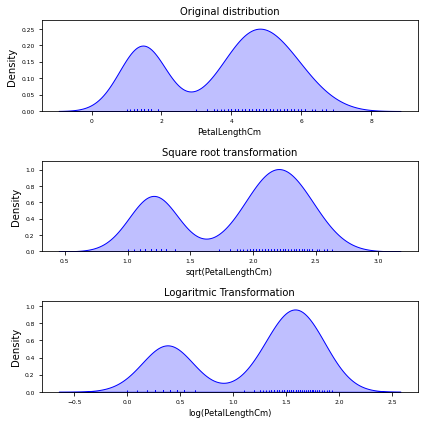

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    iris.PetalLengthCm,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original distribution", fontsize = 'medium')
axes[0].set_xlabel('PetalLengthCm', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(iris.PetalLengthCm),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(PetalLengthCm)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(iris.PetalLengthCm),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logaritmic Transformation", fontsize = 'medium')
axes[2].set_xlabel('log(PetalLengthCm)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

#####Petal Width

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/dis

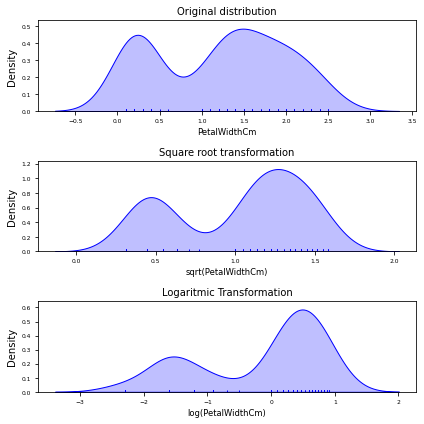

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    iris.PetalWidthCm,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original distribution", fontsize = 'medium')
axes[0].set_xlabel('PetalWidthCm', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(iris.PetalWidthCm),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(PetalWidthCm)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(iris.PetalWidthCm),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logaritmic Transformation", fontsize = 'medium')
axes[2].set_xlabel('log(PetalWidthCm)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

#####Sepal Length Distributions fit

In [ ]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(iris.SepalLengthCm, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 12.77it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,21.594548,298.950820,-275.697254,inf,0.058020,6.715366e-01
beta,21.605575,297.696988,-270.610044,inf,0.057181,6.888417e-01
gamma,21.807264,314.587931,-274.226919,inf,0.081909,2.525253e-01
norm,21.840426,317.604296,-279.009623,inf,0.089454,1.705836e-01
logistic,22.020975,325.122234,-277.774709,inf,0.087482,1.896550e-01
cauchy,22.859999,366.230025,-272.165732,inf,0.115752,3.304438e-02
powerlaw,23.152137,263.155883,-265.250325,inf,0.176050,1.546261e-04
expon,24.660651,324.050255,-260.792686,inf,0.217973,9.751278e-07
chi2,35.151070,390.514029,-202.615131,inf,0.437338,1.271807e-26


#####Descriptive statistics for numerical variables

In [ ]:
iris.select_dtypes(include=['float64', 'int']).describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#####More distribution graphs

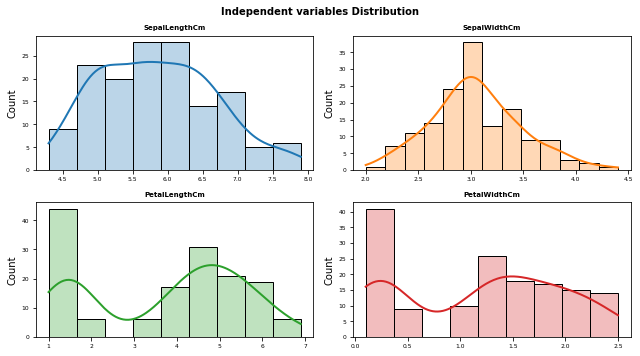

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = iris.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Id')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = iris,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Independent variables Distribution', fontsize = 10, fontweight = "bold");

#####Correlation


In [ ]:
def tidy_corr_matrix(corr_mat):
    '''
    Function to convert a pandas correlation matrix in tidy format
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

iris2 = iris.drop('Id', axis=1)

corr_matrix =  iris2.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)


,variable_1,variable_2,r,abs_r
11,PetalLengthCm,PetalWidthCm,0.962757,0.962757
14,PetalWidthCm,PetalLengthCm,0.962757,0.962757
2,SepalLengthCm,PetalLengthCm,0.871754,0.871754
8,PetalLengthCm,SepalLengthCm,0.871754,0.871754
3,SepalLengthCm,PetalWidthCm,0.817954,0.817954
12,PetalWidthCm,SepalLengthCm,0.817954,0.817954
6,SepalWidthCm,PetalLengthCm,-0.420516,0.420516
9,PetalLengthCm,SepalWidthCm,-0.420516,0.420516
7,SepalWidthCm,PetalWidthCm,-0.356544,0.356544
13,PetalWidthCm,SepalWidthCm,-0.356544,0.356544


#####Correlation heatmap

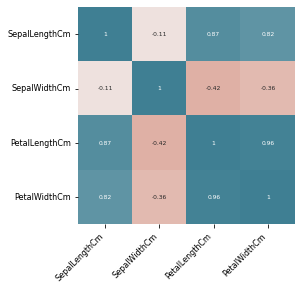

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)


#### Dependent (Response) variable: Specie (Cualitative)

#####Specie frequency

In [ ]:
pd.value_counts(iris['Species'])

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

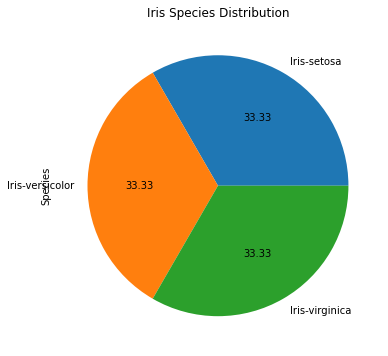

In [ ]:
plot = iris['Species'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Iris Species Distribution')

In [ ]:
iris.select_dtypes(include=['object']).describe()

,Species
count,150
unique,3
top,Iris-setosa
freq,50


#####Sizes distribution per Specie

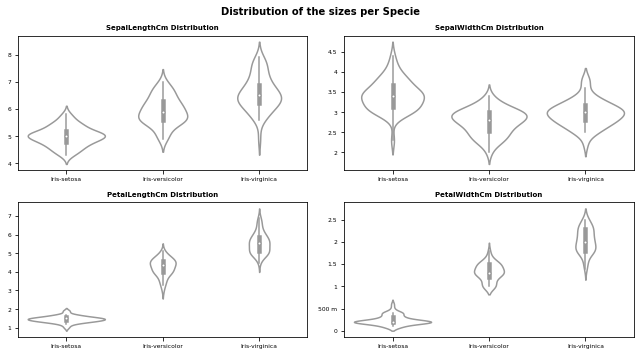

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = iris.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Id')

for i, colum in enumerate(columnas_numeric):
    sns.violinplot(
        x     = 'Species',
        y     = colum,
        data  = iris,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum} Distribution", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribution of the sizes per Specie', fontsize = 10, fontweight = "bold");

#####Train and Test division

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        iris.drop('Species', axis = 'columns'),
                                        iris['Species'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
print("Training partition")
print("-----------------------")
print(y_train.describe())

Training partition
-----------------------
count                120
unique                 3
top       Iris-virginica
freq                  42
Name: Species, dtype: object


In [ ]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count                  30
unique                  3
top       Iris-versicolor
freq                   13
Name: Species, dtype: object


####Conclusions



*   In this practice we follow the steps of the exploratory data analysis (EDA)
*   It is important to know the type of variables that we are managing (cualitative/cuantitative) and their distribution.
*   The Iris dataset contains 150 rows and 6 variables. One variable is an ID that we shouldn't use for analysis. The rest of the variables are sizes of petals and sepals. The dependent variable is categorical.
*   Sepal width and lenght variables are  distributed as a bell, while petal metrics are more disperse.
*   There is a negative correlation between Sepal width and petal length and width. This means that the longer sepal width, the shorter petal length and width.
*   There is a positive correlation between Sepal length and petal length and width. This means that the longer sepal length, the longer petal width and length.
*   Sepal length and width have negative correlation
*   We have the same proportion of each of the species (33.33%)
*   Iris virginica has the longest sepals and petals while Iris setosa has the lowest.
*   Iris setosa has the widest sepal. Iris versicolor and virginica has similar sepal widths.
*   Iris virginica has the widest petals


